In [0]:
%tensorflow_version 1.14
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Charge and prepare dataset
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya. This information would be very helpful for applicants in order to estimate their opportunities.

In [0]:

  #Import packages
  import numpy as np
  import tensorflow as tf
  import random 
  import seaborn as sns
  import matplotlib.pyplot as plt
  # Load the Pandas libraries with alias 'pd' 
  import pandas as pd 
  df_GradAdmi = pd.read_csv("/content/drive/My Drive/NeuralNetworks/Examen#1/Admission_Predict.csv") 
  # Preview the first 5 lines of the loaded data 
  df_GradAdmi.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In order to check if all columns are fullfilled and number datatype.

In [0]:
df_GradAdmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


From GRE Score to Research column information would give us the informacion to predict the chances of admissions. However for this excercise I will add an other column based "Admitted" on chance of admit prediction following the next conditions.

1.  If Chance of Admit > 90 Admitted = 1 #Admitted to grad program.
2.   If Chance of Admit <90 and >70 #Admitted would be randomly given by a random function.
3.   If Chance of Admit < 70 Admitted = 0 #Not admitted to grad program.

But, first lets get some insights from data. For example which admission factor is more relevant for admission committee.








In [0]:
df_GradAdmi.plot(x='GRE Score', y='Chance of Admit ',style='o')
df_GradAdmi.plot(x='TOEFL Score', y='Chance of Admit ',style='o')
df_GradAdmi.plot(x='University Rating', y='Chance of Admit ',style='o')
df_GradAdmi.plot(x='SOP', y='Chance of Admit ',style='o')
df_GradAdmi.plot(x='LOR ', y='Chance of Admit ',style='o')
df_GradAdmi.plot(x='CGPA', y='Chance of Admit ',style='o')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f920ddabb38>,
      dtype=object)

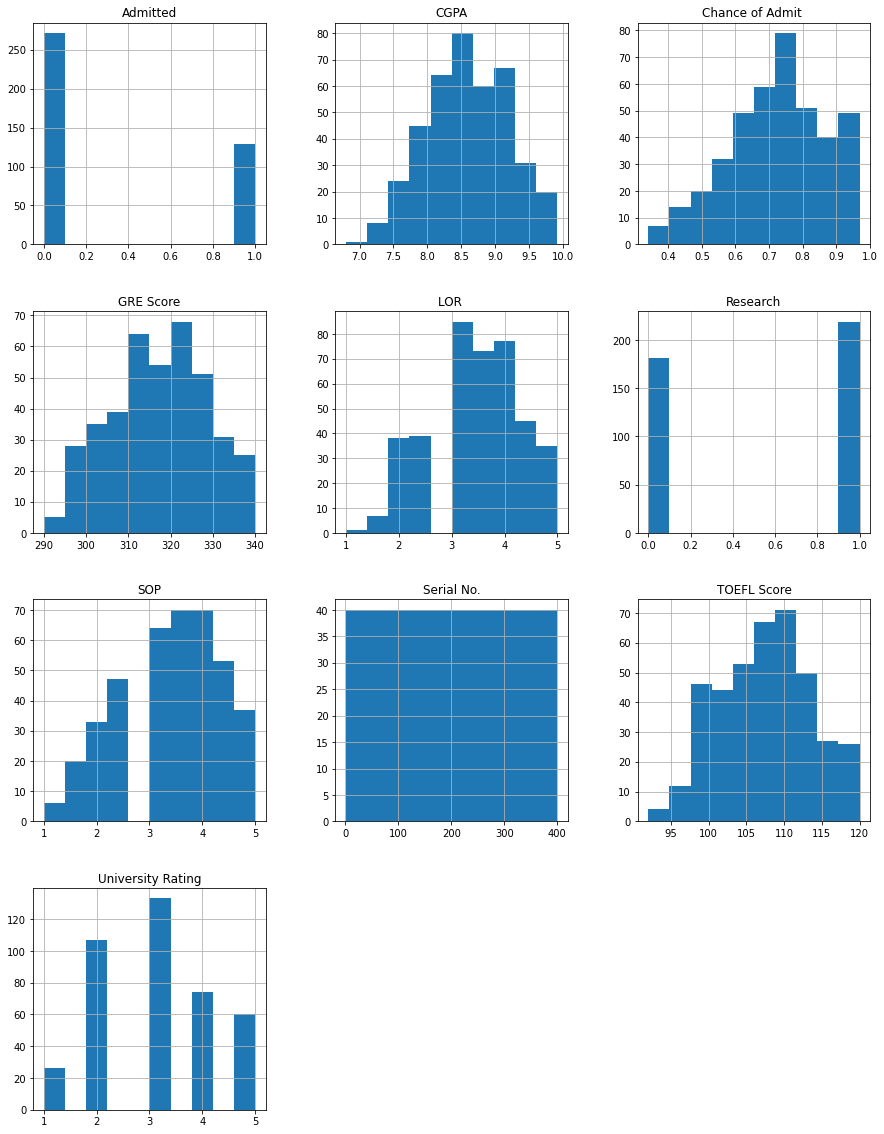

In [0]:
#Histograms of all columns
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_GradAdmi.hist(ax=ax)

Applying admision cutoff.

In [0]:

ChanceOfAdmit = df_GradAdmi['Chance of Admit '].to_numpy() # Converting Chance of admit column to numpy array
AdmittedArray = np.zeros([len(ChanceOfAdmit)]) #Creating Admitted filling it with zeros
#Conditions to be admitted mentioned above
for i in range(0,len(ChanceOfAdmit)):
  if ChanceOfAdmit[i]>0.9:
    AdmittedArray[i] = 1
  elif ChanceOfAdmit[i]<0.9 and ChanceOfAdmit[i]>0.7:
    AdmittedArray[i] = random.randint(0, 1) 
  else:
    AdmittedArray[i] = 0

df_GradAdmi['Admitted']=pd.Series(AdmittedArray)#Pass array to dataframe
df_GradAdmi.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.0


**Preliminary plots(heat map, pair plot) using seaborn.** 


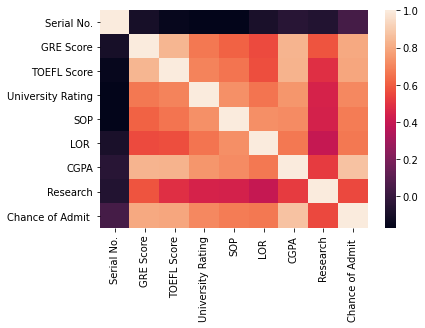

In [0]:
heatMapPlot = sns.heatmap(df_GradAdmi.corr())

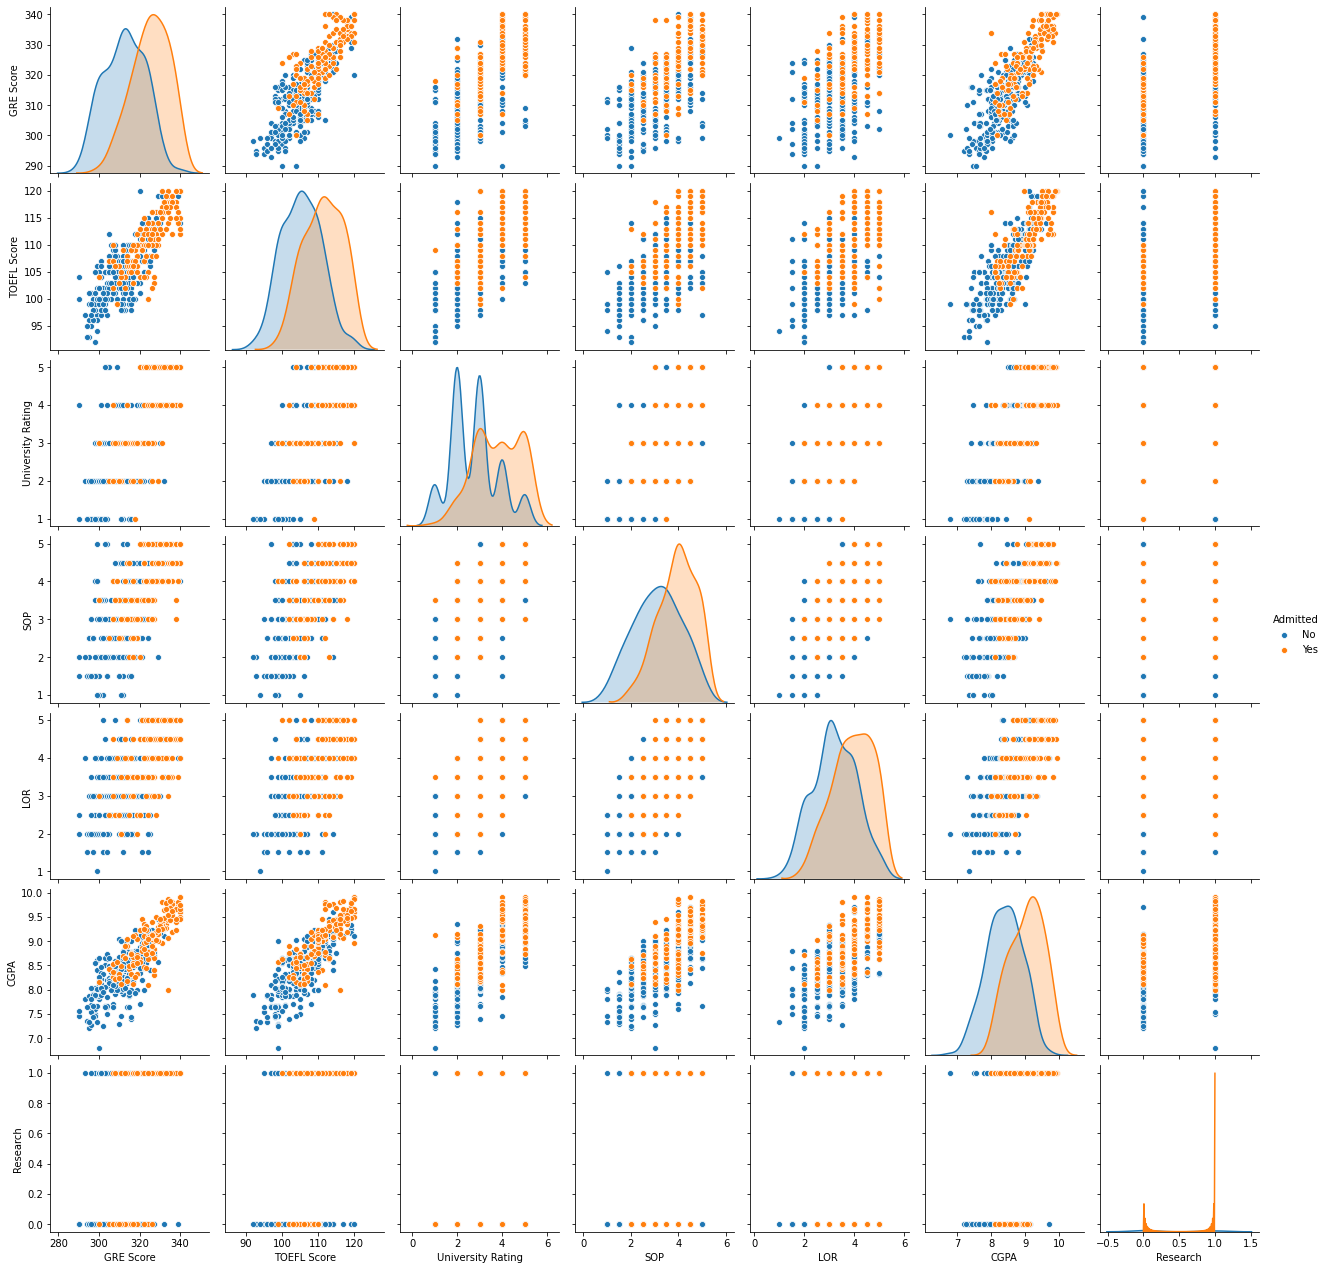

In [0]:
pairPlot = sns.pairplot(df_GradAdmi, hue='Admitted', vars =['GRE Score','TOEFL Score','University Rating','SOP','LOR ' ,'CGPA','Research'])
# title
new_title = 'Admitted'
pairPlot._legend.set_title(new_title)
# replace labels
new_labels = ['No', 'Yes']
for t, l in zip(pairPlot._legend.texts, new_labels): t.set_text(l)



Divide data in two sets, one for training and other for testing.


In [0]:
def encode(series): 
  return pd.get_dummies(series.astype(str))
df_train_x = pd.get_dummies(df_GradAdmi)

df_train_x['GRE Score'] = df_GradAdmi['GRE Score']
df_train_x['TOEFL Score'] = df_GradAdmi['TOEFL Score']
df_train_x['University Rating'] = df_GradAdmi['University Rating']
df_train_x['SOP'] = df_GradAdmi['SOP']
df_train_x['LOR'] = df_GradAdmi['LOR ']
df_train_x['CGPA'] = df_GradAdmi['CGPA']
df_train_x['Research'] = df_GradAdmi['Research']

#train_y = pd.get_dummies(df_GradAdmi['Admitted'])
df_train_y = df_GradAdmi.Admitted
df_test_y = df_GradAdmi.Admitted

totalData = df_GradAdmi[['GRE Score']].to_numpy()
lenTrain = int(len(totalData)*0.8)
lenTest = len(totalData)- lenTrain
print(lenTrain,lenTest)

#Divide dataframe for train and test data
train_x = df_train_x.iloc[0:lenTrain,0:8]
test_x = df_train_x.iloc[lenTrain:len(totalData),0:8 ]
train_y = df_train_y.iloc[0:lenTrain]
test_y = df_test_y.iloc[lenTrain:len(totalData)]

320 80


Now, is needed to normalize the features columns for neuronal optimization. 




**Features values normalization**




In [0]:

import pandas as pd
from sklearn import preprocessing

#Normalization of train dataframe using sklearn MinMaxScaler function
xTrain = train_x.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaledTrain = min_max_scaler.fit_transform(xTrain)
train_x = pd.DataFrame(x_scaledTrain)

#Normalization of test dataframe using sklearn MinMaxScaler function
xTest = test_x.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaledTest = min_max_scaler.fit_transform(xTest)
test_x = pd.DataFrame(x_scaledTest)


#Create a categorical array of result value
train_y = tf.keras.utils.to_categorical(
    train_y, num_classes=None, dtype='float32'
)
test_y = tf.keras.utils.to_categorical(
    test_y, num_classes=None, dtype='float32'
)

#Building the Neural Network

Declaring the neural network implies to select how many hidden layers, neurons per layer and output array. In this case the output is binary, we only have two options: admitted = 1 and not admitted = 0. 

In [0]:
n_hidden_1 = 40 #Numbers of neurons in hidden layer number 1.
n_input = train_x.shape[1]#Number of neurons in first neural layer.
n_classes = train_y.shape[1]#Number of outputs.


In [0]:
def multilayer_perceptron(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)# Using Relu as activation function
    layer_1 = tf.nn.dropout(layer_1, keep_prob) 
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer
weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.random.normal([n_hidden_1, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'out': tf.Variable(tf.random.normal([n_classes]))
}
keep_prob = tf.placeholder("float")

In [0]:
training_epochs = 10000
display_step =500
lr = 0.001

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

predictions = multilayer_perceptron(x, weights, biases, keep_prob)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predictions, labels=y))
#cost = tf.reduce_mean(tf.squared_difference(predictions, y))
optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

tf.summary.scalar("cost",cost)

sess = tf.Session()
init = tf.global_variables_initializer()
merged_op = tf.summary.merge_all()
#cost_summary = tf.summary.scalar("cost",cost)
train_writer = tf.summary.FileWriter("/content/drive/My Drive/NeuralNetworks/Examen#1/TensorBoard",sess.graph)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Creating and initializing tensorflow session



In [0]:
#Defininf accuracy formula 
prob = tf.nn.softmax(train_x, name="output")
prediction = tf.argmax(prob, 1)
equality = tf.equal(predictions, train_y)
accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))


sess.run(init)
train_writer.add_graph(sess.graph)


#Dataframe to get admitted in UCLA

First, let's train the neural network.

In [0]:

costValue = 0.0
accuracyValue = 0.0
loss_list = [] #Array of loss functions for each training iteration
accuracy_list = [] #Array of accuracy of each training iteration
accuracy_list_test = [] #Array of accuracy of each training iteration

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for k in range(training_epochs): #Loop for number of iterations
   # summary, _ = sess.run(merged_op,
    _, loss, acc = sess.run([optimizer, cost, accuracy], 
   # _, summary = sess.run([step, merged_op],
                              feed_dict={
                                  x:train_x, 
                                  y:train_y,
                                  keep_prob: 1
                                  }) #Core function of neural network 
    #Getting numeric values for accuracy and error
    accuracyValue = acc
    costValue = loss   
    
    #Adding error and accuracy to summary File for TensorBoard
    lossSummary = tf.Summary(value=[tf.Summary.Value(tag="loss", simple_value=loss)])
    accSummary = tf.Summary(value=[tf.Summary.Value(tag="accuracy", simple_value=acc)])

    #Writing tensorboard file
    train_writer.add_summary(lossSummary,k)
    train_writer.add_summary(accSummary,k)

    #Defining accuracy 
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    loss_list.append(loss)
    accuracy_list.append(acc)

    if k % display_step == 0:
      print("Epoch:", '%04d' % (k+1), "cost=","{:.9f}".format(costValue), "  accuracy=","{:.9f}".format(accuracyValue)) #Display every display_step cost        
  

  accuracy_list_test.append(accuracy.eval({x: test_x, y: test_y, keep_prob: 1.0}))
  print("Test Accuracy:", accuracy.eval({x: test_x, y: test_y, keep_prob: 1.0})) #Display final accuracy 


Epoch: 0001 cost= 0.920748055   accuracy= 0.000000000
Epoch: 0501 cost= 0.381846964   accuracy= 0.806249976
Epoch: 1001 cost= 0.332138866   accuracy= 0.850000024
Epoch: 1501 cost= 0.296937138   accuracy= 0.871874988
Epoch: 2001 cost= 0.269217789   accuracy= 0.884374976
Epoch: 2501 cost= 0.246991202   accuracy= 0.899999976
Epoch: 3001 cost= 0.227824643   accuracy= 0.912500024
Epoch: 3501 cost= 0.211715892   accuracy= 0.918749988
Epoch: 4001 cost= 0.198114246   accuracy= 0.934374988
Epoch: 4501 cost= 0.185710743   accuracy= 0.937500000
Epoch: 5001 cost= 0.174668938   accuracy= 0.943750024
Epoch: 5501 cost= 0.160910398   accuracy= 0.943750024
Epoch: 6001 cost= 0.147506759   accuracy= 0.953125000
Epoch: 6501 cost= 0.132795408   accuracy= 0.959375024
Epoch: 7001 cost= 0.120928094   accuracy= 0.959375024
Epoch: 7501 cost= 0.109399602   accuracy= 0.968750000
Epoch: 8001 cost= 0.099583328   accuracy= 0.975000024
Epoch: 8501 cost= 0.089799248   accuracy= 0.978124976
Epoch: 9001 cost= 0.08160021

**Plots of neural network training for accuracy and loss function**

Text(0, 0.5, 'Accuracy')

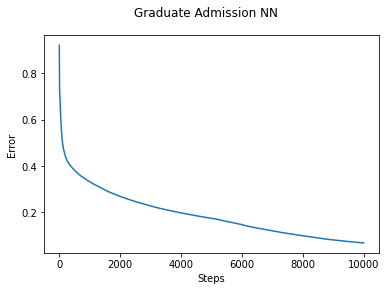

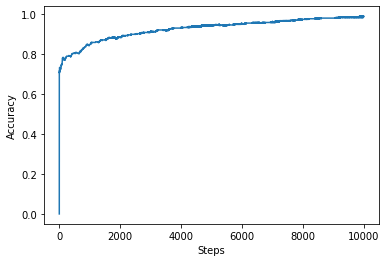

In [0]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(loss_list)
fig.suptitle('Graduate Admission NN')
plt.xlabel('Steps')
plt.ylabel('Error')
fig1 = plt.figure()
plt.plot(accuracy_list)
plt.xlabel('Steps')
plt.ylabel('Accuracy')

**To Run TensorBoard graps use the TensorBoardGradAdmi notebook**

I had problem with loading tensorboard in this notebook due tensorflow different versions.